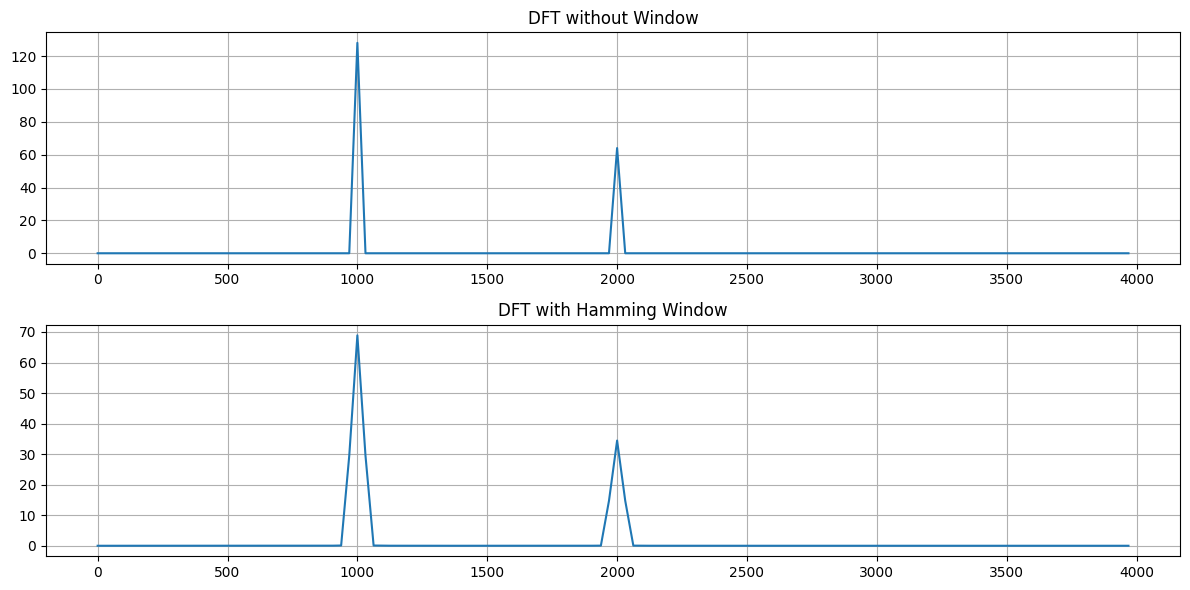

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

fs = 8000
N = 256
n = np.arange(N)
f1 =1000
f2 =2000

x = np.sin(2*np.pi*f1*n/fs) + 0.5*np.sin(2*np.pi*f2*n/fs+3*np.pi/4)

w = np.hamming(N)
x_w = x*w
X = np.fft.fft(x)
Xw = np.fft.fft(x_w)

freq = np.fft.fftfreq(N ,d=1/fs)

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.title("DFT without Window")
plt.plot(freq[:N//2], np.abs(X[:N//2]))
plt.grid()

plt.subplot(2,1,2)
plt.title("DFT with Hamming Window")
plt.plot(freq[:N//2], np.abs(Xw[:N//2]))
plt.grid()
plt.tight_layout()
plt.show()

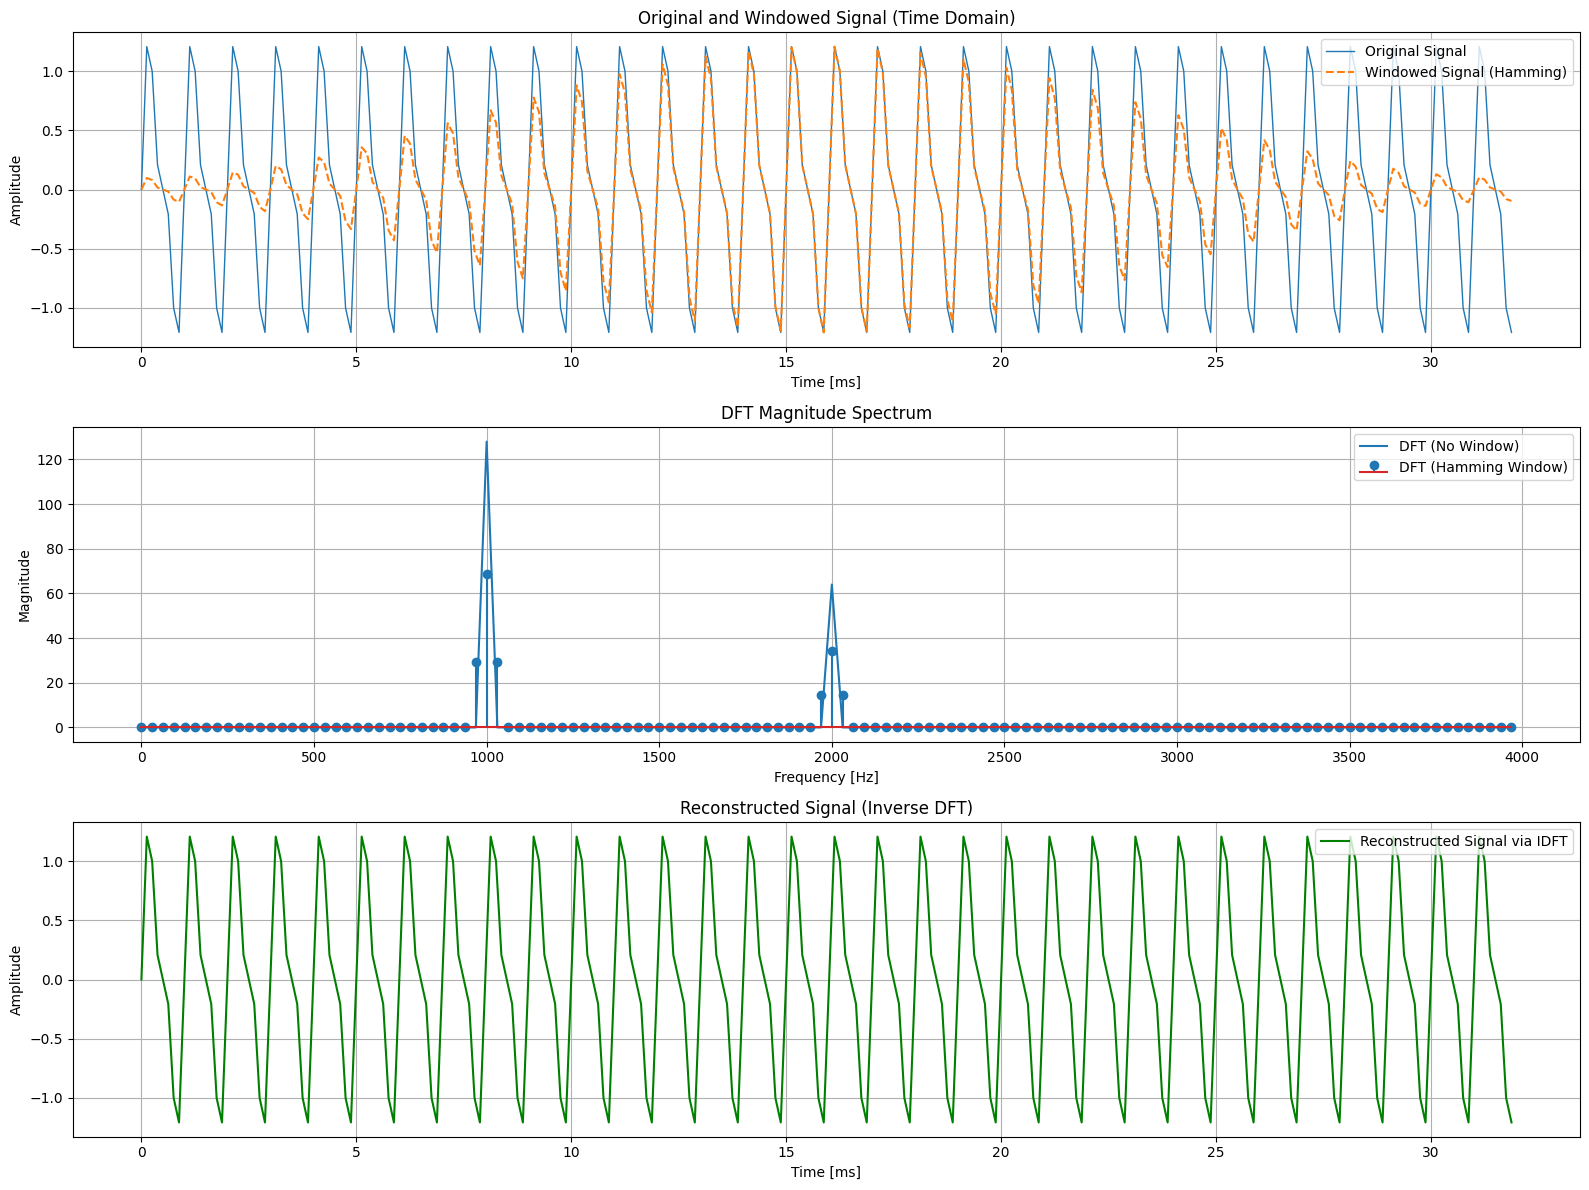

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Parameters
# ------------------------------
fs = 8000            # Sampling frequency [Hz]
T = 1 / fs           # Sampling interval [s]
N = 256              # Number of samples
t = np.arange(N) * T # Time vector

# ------------------------------
# Signal Definition
# xa(t) = sin(2π1000t) + 0.5*sin(2π2000t + 4π)
# ------------------------------
x = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t + 4 * np.pi)

# ------------------------------
# Manual Hamming Window Function
# ------------------------------
def hamming_window(N):
    n = np.arange(N)
    return 0.54 - 0.46 * np.cos((2 * np.pi * n) / (N - 1))

# Create Hamming window
window = hamming_window(N)

# Apply window to signal
x_windowed = x * window

# ------------------------------
# DFT and IDFT
# ------------------------------
X = np.fft.fft(x)                # DFT without window
X_w = np.fft.fft(x_windowed)     # DFT with window
freq = np.fft.fftfreq(N, T)      # Frequency axis

x_reconstructed = np.fft.ifft(X).real  # IDFT (reconstructed time domain)

# ------------------------------
# Plotting
# ------------------------------
plt.figure(figsize=(16, 12))

# Time-domain: original and windowed
plt.subplot(3, 1, 1)
plt.plot(t * 1000, x, label='Original Signal', linewidth=1)
plt.plot(t * 1000, x_windowed, label='Windowed Signal (Hamming)', linestyle='--')
plt.title("Original and Windowed Signal (Time Domain)")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Frequency-domain: DFT and Windowed DFT
plt.subplot(3, 1, 2)
plt.plot(freq[:N//2], np.abs(X[:N//2]), label='DFT (No Window)')
plt.stem(freq[:N//2], np.abs(X_w[:N//2]), label='DFT (Hamming Window)')
plt.title("DFT Magnitude Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)

# Reconstructed Signal (from IDFT)
plt.subplot(3, 1, 3)
plt.plot(t * 1000, x_reconstructed, label='Reconstructed Signal via IDFT', color='green')
plt.title("Reconstructed Signal (Inverse DFT)")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
